# Exploratory Data Analysis with python

### we will use heart disease data (link provided in description)

### import necessory libraries

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

### read the csv and have a look at data (no of rows, type of columns ets)

In [2]:
df = pd.read_csv('heart.csv')
#lets look at dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### lets explore each column and how they relate each other in accordance with (Target) heart disease
### age ,sex ,chol (cholestrol) ,thalac (maximum heart rate achieved) etc..

### 1.age

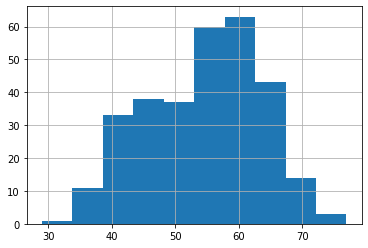

In [3]:
# lets have a histogram
df.age.hist()

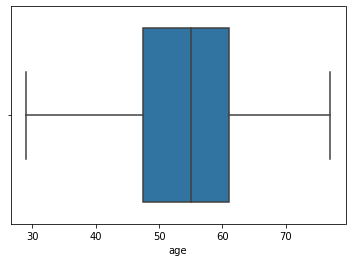

In [4]:
#this can be better seen by boxplot

sns.boxplot(df.age,data=df)

### inference : There are mostly 50 - 60 years of age

### 2.chol (cholestrol)

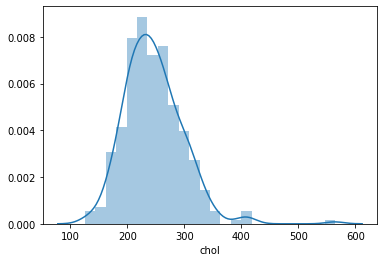

In [5]:
# lets have a distplot for cholestrol

sns.distplot(df.chol)

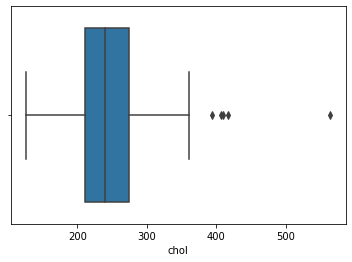

In [6]:
# for more accurate we can have boxplot

sns.boxplot(df.chol,data=df)

### Inference: cholestrol value of normal person is around 200 to 250 we can see there are value upto 300 and also some outliers upto 500

In [7]:
#lets have a look at our colums
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
#we have this target 
#target here have two values
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
# target 1: presence of heart disease
# target 0: not present

# for our ease of exploration lets have two seperate dataframe for both

df_present = df[df['target'] == 1]
df_notpresent = df[df['target'] == 0]

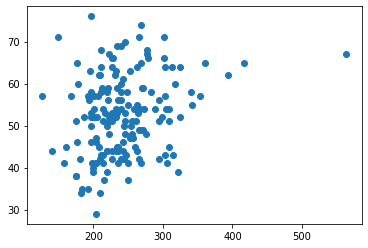

In [10]:
# ok lets see relation in chol and age
# lets have a scatterplot

plt.scatter(df_present.chol,df_present.age)

### inference : clearly higher value of cholestrol in diseased people is occupied by Aged people mostly from 60 to 70 age people

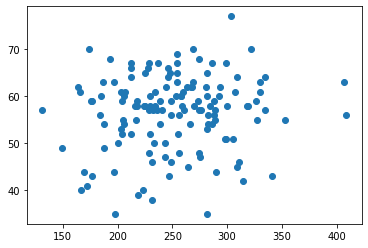

In [11]:
# lets have scatter plot for normal people
plt.scatter(df_notpresent.chol,df_notpresent.age)

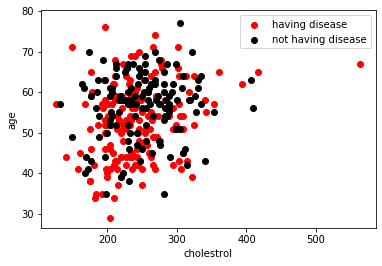

In [12]:
# lets have combine visualisation for better understanding

plt.scatter(df_present.chol,df_present.age,label='having disease',color='red')

plt.scatter(df_notpresent.chol,df_notpresent.age,label='not having disease',color='black')

plt.xlabel('cholestrol')
plt.ylabel('age')
plt.legend()

### infernce: There is a clear segregation in targets

### 3.blood pressure

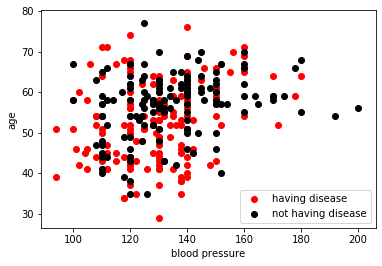

In [13]:
#lets have a similar visualisation for blood pressure 

# lets have combine visualisation for better understanding

plt.scatter(df_present.trestbps,df_present.age,label='having disease',color='red')

plt.scatter(df_notpresent.trestbps,df_notpresent.age,label='not having disease',color='black')

plt.xlabel('blood pressure')
plt.ylabel('age')
plt.legend()

<BarContainer object of 165 artists>

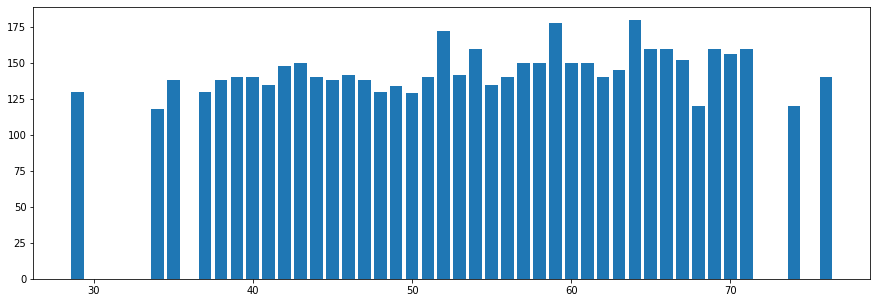

In [14]:
plt.figure(figsize=(15,5))
# lets look at a bar chart of blood pressure and victims
plt.bar(df_present.age,df_present.trestbps)

In [15]:
# lets have another column SEX
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
# 1 is for male
# 0 for female

df_present['sex'] = np.where(df_present['sex']==1,'male','female')
df_present.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,1


#### ok lets now have a visualisation on the basis of sex 
#### lets see for chol and blood pressure

### 4.Sex

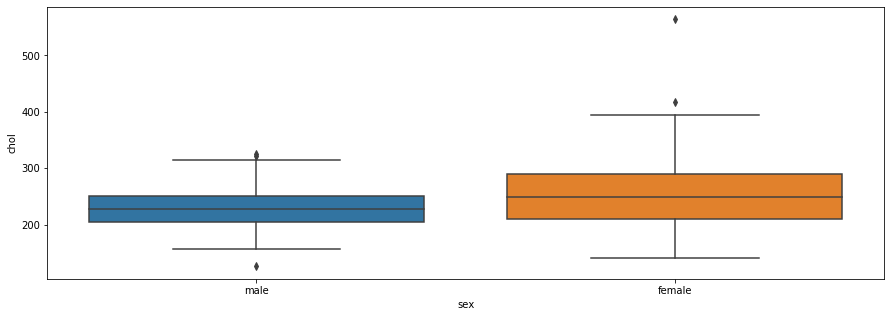

In [17]:
# lets plot a boxplot 
plt.figure(figsize=(15,5))
sns.boxplot(df_present.sex,df_present.chol)

### inference : females are having a higher rate of cholestrol


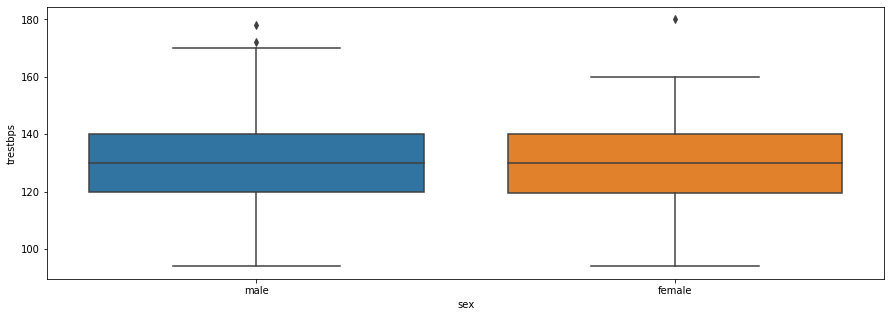

In [18]:
# lets do same for blood pressure
plt.figure(figsize=(15,5))
sns.boxplot(df_present.sex,df_present.trestbps)

### Inference : Males have a bit higher blood pressure 

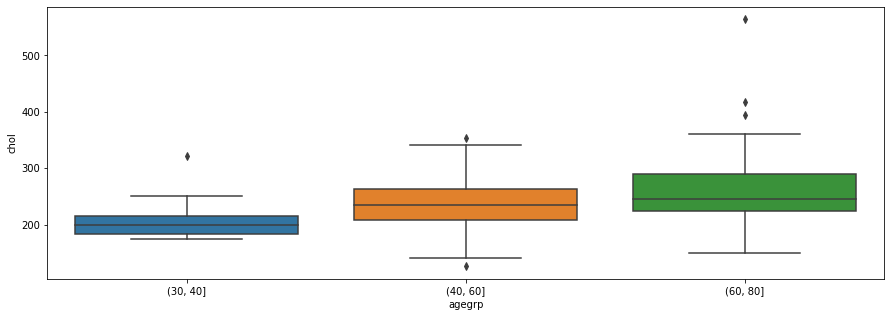

In [22]:
# lets see this age group wise
plt.figure(figsize=(15,5))
df_present['agegrp'] = pd.cut(df_present.age,[30,40,60,80])
sns.boxplot(x='agegrp',y='chol',data=df_present)

### lets see cholestrol  age group wise with sex


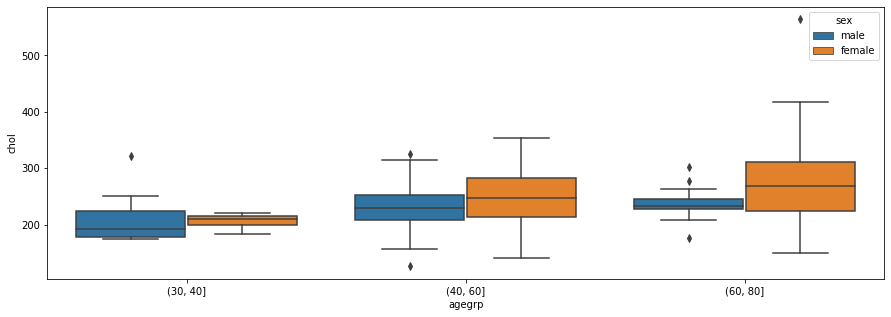

In [27]:
plt.figure(figsize=(15,5))
df_present['agegrp'] = pd.cut(df_present.age,[30,40,60,80])
sns.boxplot(x='agegrp',y='chol',data=df_present,hue=df_present.sex)